### Importing Libraries

In [86]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<br>




### Importing Data

In [87]:
titanic_survival = pd.read_csv("./data/train.csv")

<br>

### Dataframe

In [88]:
titanic_survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h4><u>Datatypes</u><h4>

In [89]:
titanic_survival.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<h4><u>Null Values</u><h4>

In [90]:
titanic_survival.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
titanic_survival.groupby(["Sex"])["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [92]:
titanic_survival.drop(columns=["Name","Ticket","Cabin"] , inplace = True)

In [93]:
titanic_survival

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [94]:
survived_total = titanic_survival["Survived"].sum()

In [95]:
passengers_on_board = len(titanic_survival)



$$
\text{survival rate} = \frac{\text{survived}}{\text{total}}
$$




In [96]:
survival_rate = (survived_total / passengers_on_board) * 100

In [97]:
survival_rate

38.38383838383838

### There are a total of 38.38% chance of survival rate if you were to be on board on the Titanic

In [98]:
titanic_survival.groupby(["Embarked"])["Embarked"].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [99]:
titanic_survival.groupby(["Embarked"])["Survived"].sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

### Finding the survival chance of each Embarked

In [100]:
cherbourg_total , queenstown_total , southampton_total = 168 , 77 , 644

In [101]:
cherbourg_survive , queenstown_survive , southampton_survive = 93,30,217

In [102]:
C_rate , Q_rate , S_rate = ((cherbourg_survive * 100) / cherbourg_total) , ((queenstown_survive * 100) / queenstown_total) , ((southampton_survive * 100) / southampton_total)

In [103]:
print("Southampton Survival rate: " , S_rate , "%")

Southampton Survival rate:  33.69565217391305 %


In [104]:
print("Queenstown Survival rate: " , Q_rate , "%")

Queenstown Survival rate:  38.96103896103896 %


In [105]:
print("Cherbourg Survival rate: " , C_rate , "%")

Cherbourg Survival rate:  55.357142857142854 %


> <br>
> After suming up the total survival of each Embarked we can see that Cherbourg embarked seems to have the most chance of Survival rate of 55.35% <br><br>
> And the least likely to survive is Southampton embark which is 33.69% <br><br>
> While Queenstown have the survival rate of 38.96% <br><br>
> <br>

In [106]:
# left = (titanic_survival["Age"] <= 16)
# highlight = (16 < titanic_survival["Age"]) & (titanic_survival["Age"] < 32)
# right = (titanic_survival["Age"] >= 32)


# data = [
# titanic_survival["Age"][left].to_list(),
# titanic_survival["Age"][condition].to_list(),
# titanic_survival["Age"][right].to_list(),
# ]

In [107]:
titanic_survival

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


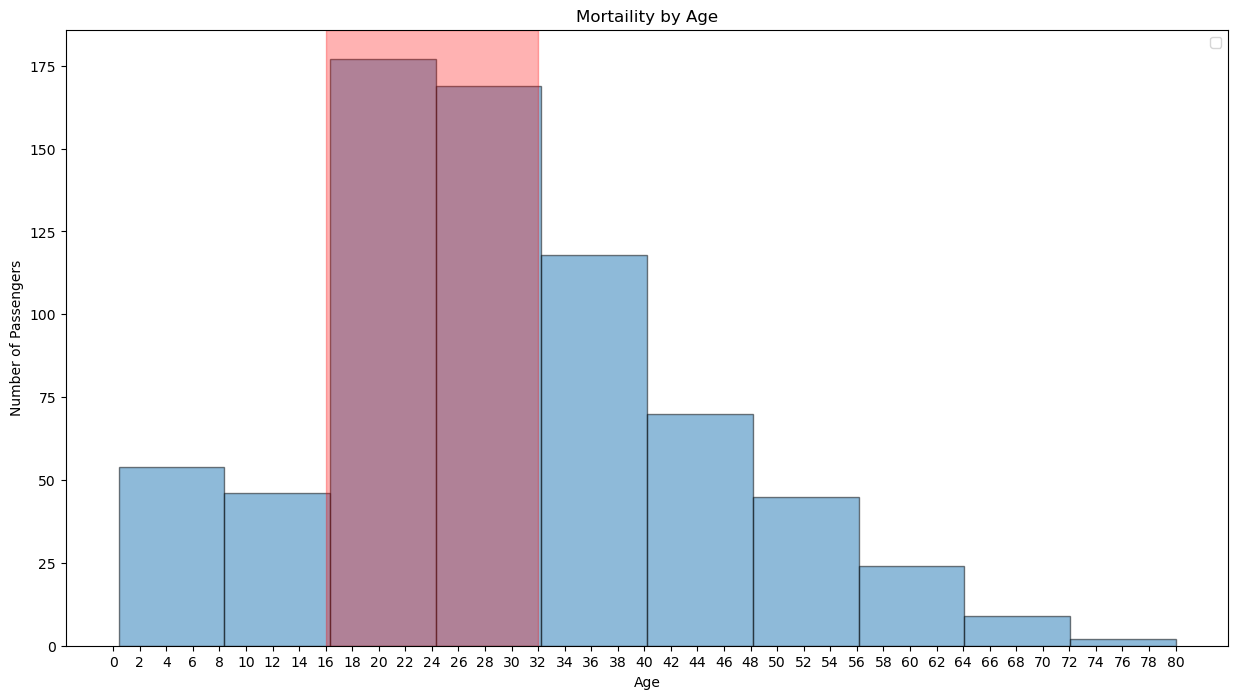

In [108]:
fig, ax = plt.subplots(figsize=(15, 8))

x = titanic_survival["Age"]

ax.hist(x, bins=10, alpha=0.5,edgecolor="black")
plt.xticks(np.arange(0, 82, 2))
plt.axvspan(16, 32, alpha=0.3, color='red')


ax.set_xlabel("Age")
ax.set_ylabel("Number of Passengers")
ax.set_title("Mortaility by Age")
ax.legend()

plt.show()

In [109]:
# plt.figure(figsize=(16, 8))

# titanic_survival['Age'].hist()
# plt.xticks(np.arange(0, 82, 2))

# plt.grid(True)
# plt.title('AGE')
# plt.show()

In [110]:
travel_alone = titanic_survival[(titanic_survival['Parch'] == 0) & (titanic_survival["SibSp"] == 0)]

In [111]:
travel_alone_total = len(travel_alone)

In [112]:
travel_alone.groupby(["Survived"])["Survived"].count()

Survived
0    374
1    163
Name: Survived, dtype: int64

In [113]:
travel_alone_survived = 163

In [114]:
alone_survival_rate = (travel_alone_survived * 100) / travel_alone_total

In [115]:
alone_survival_rate = round(alone_survival_rate , 2)

In [116]:
print("Traveling alone has the total survival rate of :" , alone_survival_rate , "%")

Traveling alone has the total survival rate of : 30.35 %


In [117]:
travel_together = titanic_survival[(titanic_survival['Parch'] > 0) & (titanic_survival["SibSp"] > 0)]

In [118]:
travel_together_total = len(travel_together)

In [119]:
travel_together.groupby("Survived")["Survived"].count()

Survived
0    80
1    62
Name: Survived, dtype: int64

In [120]:
travel_together_survived = 62

In [121]:
travel_together_survival_rate = (travel_together_survived * 100) / travel_together_total

In [122]:
travel_together_survival_rate = round(travel_together_survival_rate , 2)

In [123]:
print("The chance Survival rate of traveling together is :" , travel_together_survival_rate , "%")

The chance Survival rate of traveling together is : 43.66 %



***we found that if you were to travel with family memebers or together on board you have a more chance of being survived, which is 43.66%***

<br>
<br>
<br>
<br>
<br>

In [124]:
titanic_survival.groupby("Sex")["Sex"].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [125]:
titanic_survival.groupby("Sex")["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [126]:
female_total , male_total = 314 , 577

In [127]:
female_survived , male_survived = 233,109

In [128]:
female_survival_rate = (female_survived * 100)/female_total
female_survival_rate = round(female_survival_rate , 2)

In [129]:
print("Female have the survival rate of :" , female_survival_rate , "%")

Female have the survival rate of : 74.2 %


In [130]:
male_survived_rate = (male_survived * 100) / male_total
male_survived_rate = round(male_survived_rate,2)

In [131]:
print("Male have the survival rate of :" , male_survived_rate , "%")

Male have the survival rate of : 18.89 %


***By "Sex" group "Female" group have a higher chance of survival rate (74.2%) compared to "Male" which is 19%***

In [132]:
titanic_survival.groupby("Pclass")["Pclass"].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [133]:
titanic_survival.groupby("Pclass")["Survived"].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [134]:
firstclass_total, secondclass_total , thirdclass_total = 216 , 184 , 491
firstclass_survived, secondclass_survived , thirdclass_survived = 136 , 87 , 119

firstclass_survival_rate , secondclass_survival_rate , thirdclass_survival_rate = ((firstclass_survived * 100) / firstclass_total) , ((secondclass_survived * 100) / secondclass_total) , ((thirdclass_survived * 100) / thirdclass_total)
firstclass_survival_rate , secondclass_survival_rate , thirdclass_survival_rate = round(firstclass_survival_rate, 2  ),round( secondclass_survival_rate ,2), round(thirdclass_survival_rate , 2)  

In [135]:
print("The first class has the survival rate of :", firstclass_survival_rate, "%")
print("The first class has the survival rate of :", secondclass_survival_rate, "%")
print("The first class has the survival rate of :", thirdclass_survival_rate, "%")

The first class has the survival rate of : 62.96 %
The first class has the survival rate of : 47.28 %
The first class has the survival rate of : 24.24 %


# First class have the highest chance of survival rate which is 62.96%
# Second class have the survival rate of 47.28%
# Third class have the survival rate of 24.24%

In [136]:
kids = titanic_survival[(titanic_survival["Age"] > 0 ) & (titanic_survival["Age"] <= 17)]
young_adult = titanic_survival[(titanic_survival["Age"] > 17 ) & (titanic_survival["Age"] <= 40)]
adult = titanic_survival[(titanic_survival["Age"] > 40 ) & (titanic_survival["Age"] <= 60)]
elderly = titanic_survival[titanic_survival["Age"] > 60]

In [137]:
kids_total , young_adult_total , adult_total , elderly_total = len(kids) , len(young_adult) , len(adult) , len(elderly)

In [138]:
kids_survived , young_adult_survived , adult_survived , elderly_survived = kids["Survived"].sum() , young_adult["Survived"].sum() , adult["Survived"].sum() , elderly["Survived"].sum()

In [139]:
kids_survival_rate = round((kids_survived * 100) / kids_total , 2)
print("Survival rate of Kids is :" , kids_survival_rate , "%")

Survival rate of Kids is : 53.98 %


In [140]:
young_adult_survival_rate = round((young_adult_survived * 100) / young_adult_total , 2)
print("Survival rate of Young adult is :" , young_adult_survival_rate , "%")

Survival rate of Young adult is : 38.58 %


In [141]:
adult_survival_rate = round((adult_survived * 100) / adult_total , 2)
print("Survival rate of adult is :" , adult_survival_rate , "%")

Survival rate of adult is : 39.06 %


In [142]:
elderly_survival_rate = round((elderly_survived * 100) / elderly_total , 2)
print("Survival rate of elderly person is :" , elderly_survival_rate , "%")

Survival rate of elderly person is : 22.73 %


# Kids have the Survival rate of 53.98% (0 - 17) Years old
# Young Adult have the Survival rate of 38.58% (18 - 40) Years old
# Adult have the Survival rate of 39.06% (41 - 60) Years old
# Elderly have the Survival rate of 22.73% (60+) Years old

In [143]:
age_cat = {'kids':  kids ,"young adult" :  young_adult ,"adult" :  adult , "elderly" :  elderly }

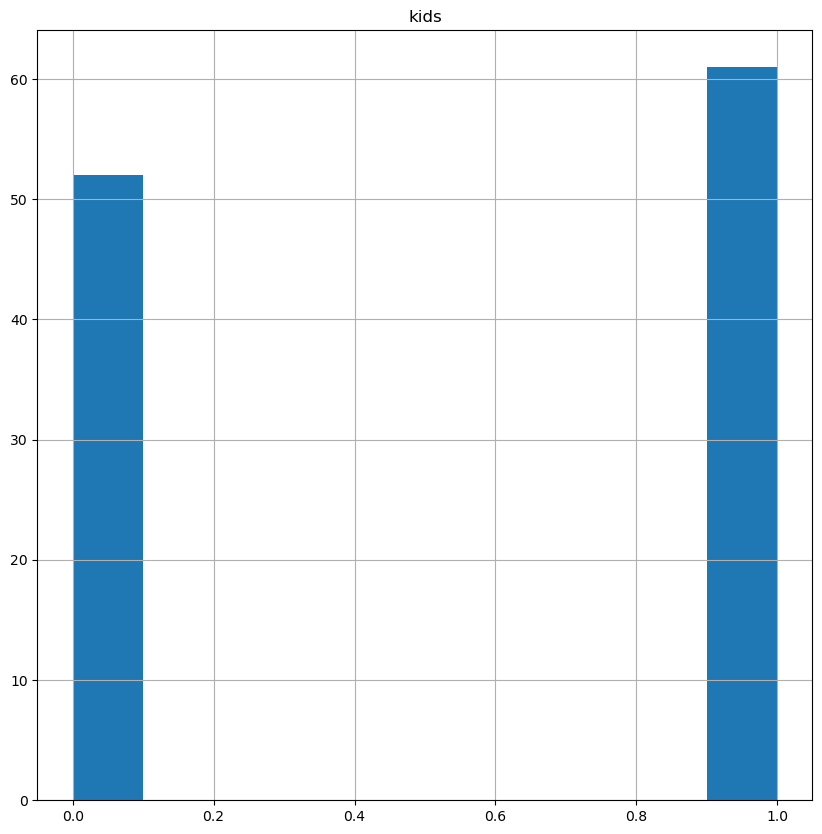

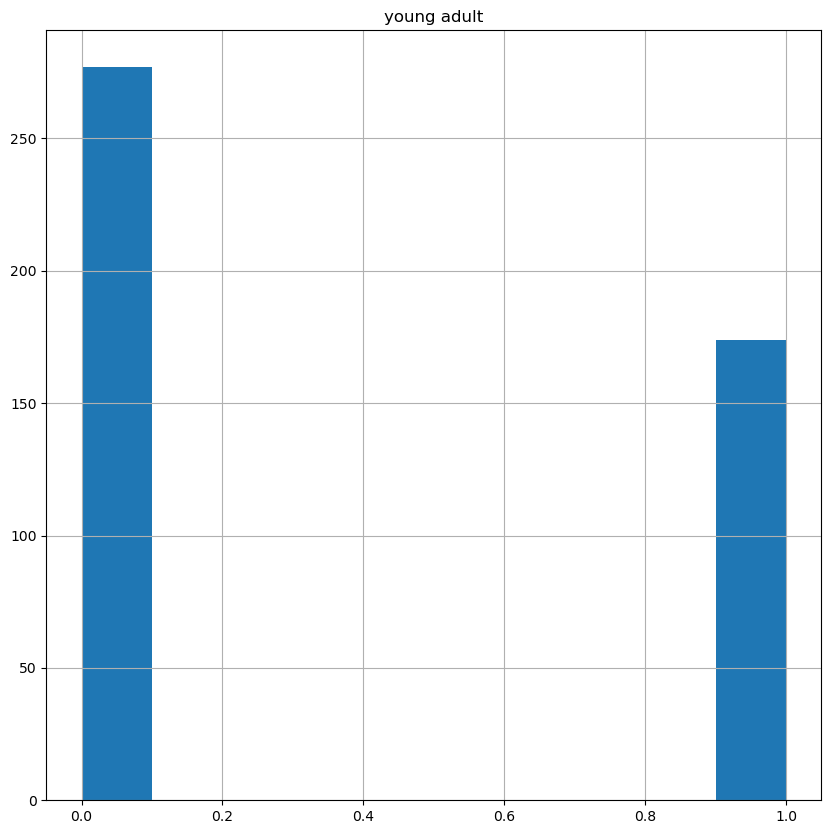

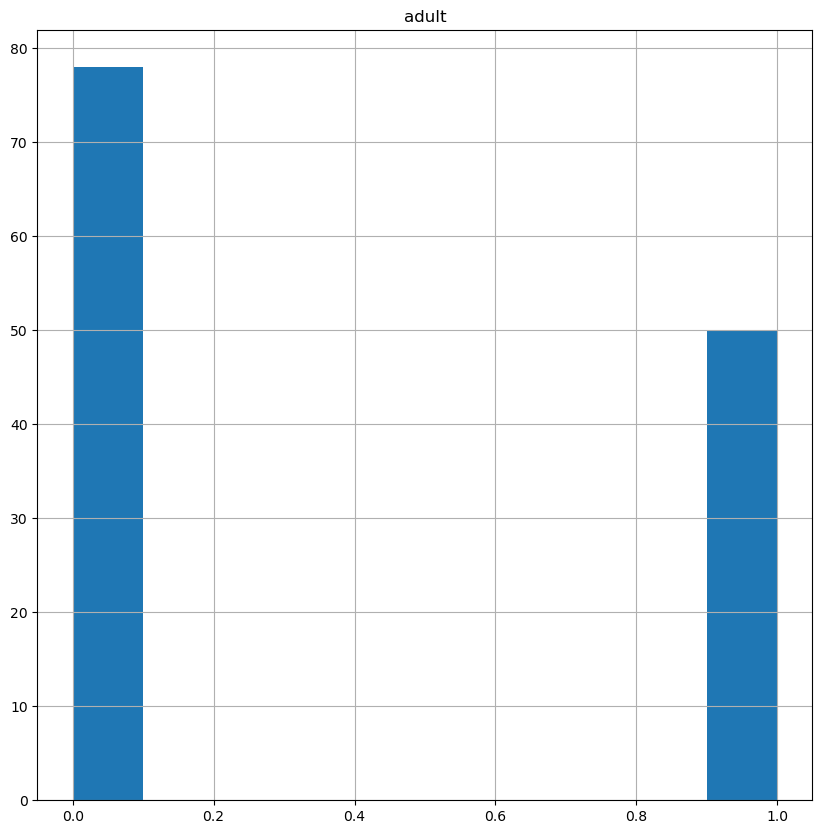

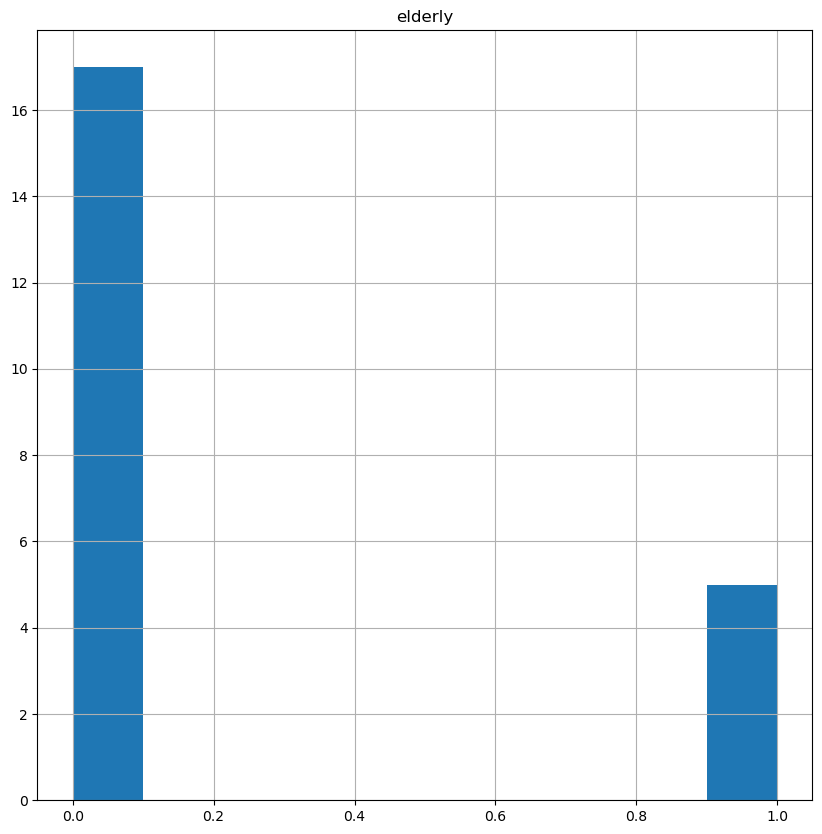

In [144]:
for i in age_cat.items():
    plt.figure(figsize=(10,10))
    i[1]["Survived"].hist()
    plt.title(i[0])

In [145]:
travel_alone

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,3,1,3,female,26.0,0,0,7.9250,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
11,12,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,7.0500,S
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [146]:
travel_alone["Survived"].sum()

163

Text(0.5, 1.0, 'Travel Alone')

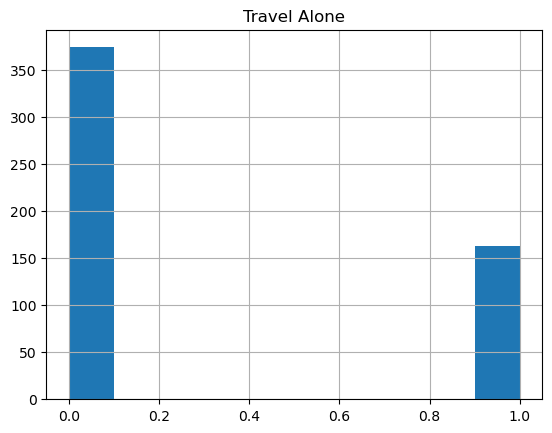

In [147]:
travel_alone["Survived"].hist()
plt.title("Travel Alone")

Text(0.5, 1.0, 'Travel Together')

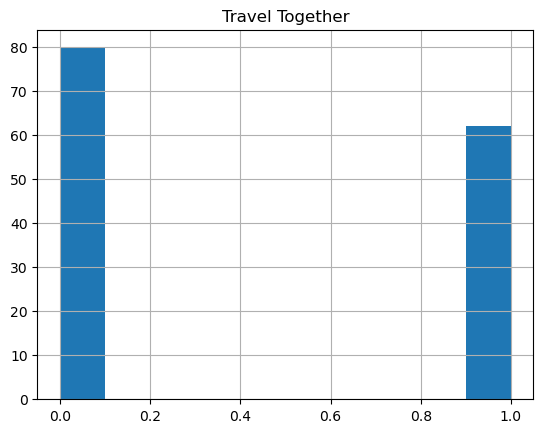

In [148]:
travel_together["Survived"].hist()
plt.title("Travel Together")

In [149]:
travel_together

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,8,0,3,male,2.0,3,1,21.0750,S
10,11,1,3,female,4.0,1,1,16.7000,S
13,14,0,3,male,39.0,1,5,31.2750,S
16,17,0,3,male,2.0,4,1,29.1250,Q
24,25,0,3,female,8.0,3,1,21.0750,S
...,...,...,...,...,...,...,...,...,...
856,857,1,1,female,45.0,1,1,164.8667,S
863,864,0,3,female,NaN,8,2,69.5500,S
869,870,1,3,male,4.0,1,1,11.1333,S
871,872,1,1,female,47.0,1,1,52.5542,S


In [155]:
travel_alone["Survived"]

2      1
4      0
5      0
6      0
11     1
      ..
884    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 537, dtype: int64

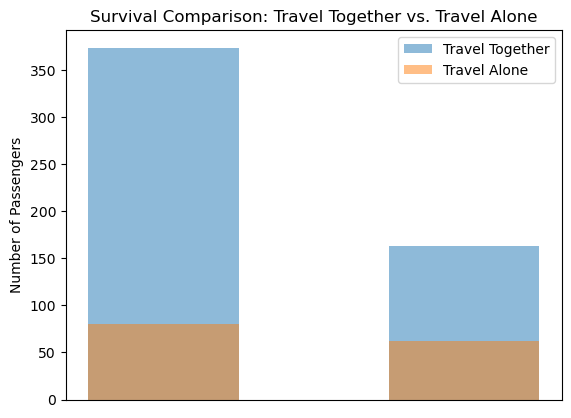

In [156]:
fig, ax = plt.subplots()

ax.hist(travel_alone["Survived"]    , bins=3   , alpha=0.5 , label="Travel Together")
ax.hist(travel_together["Survived"] , bins=3   , alpha=0.5 , label="Travel Alone")

ax.set_xticks([])
ax.set_ylabel("Number of Passengers")
ax.set_title("Survival Comparison: Travel Together vs. Travel Alone")
ax.legend()

plt.show()

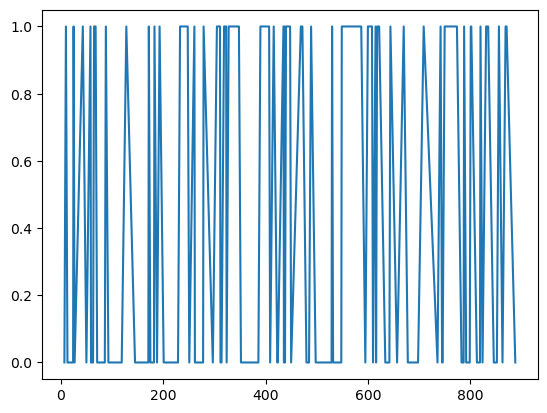

In [151]:
fig, ax = plt.subplots()

ax.plot(travel_together["Survived"], label="Travel Alone", linestyle="-")

plt.show() 

Text(0.5, 1.0, 'Female')

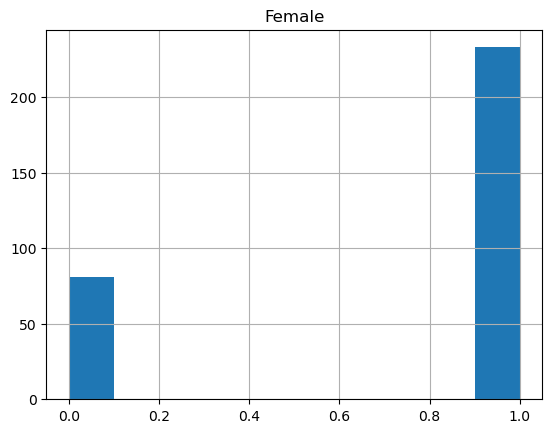

In [152]:
titanic_survival[titanic_survival["Sex"] == "female"]["Survived"].hist()
plt.title("Female")

Text(0.5, 1.0, 'Male')

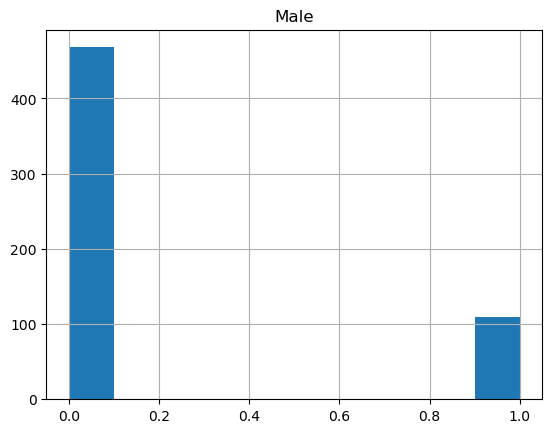

In [153]:
titanic_survival[titanic_survival["Sex"] == "male"]["Survived"].hist()
plt.title("Male")

In [154]:
embark[embark["Embarked"] == "S"]["Survived"].hist()
plt.title("S Embark")

NameError: name 'embark' is not defined

Text(0.5, 1.0, 'C Embark')

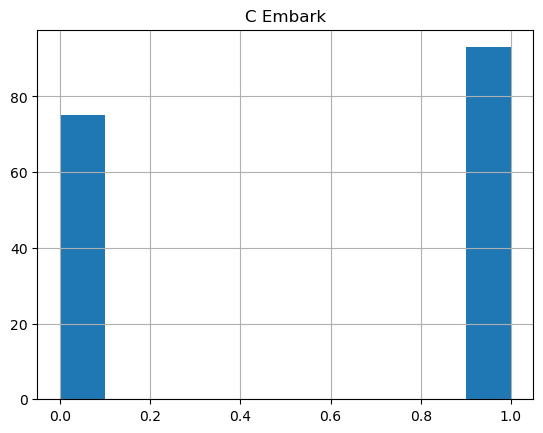

In [ ]:
embark[embark["Embarked"] == "C"]["Survived"].hist()
plt.title("C Embark")

Text(0.5, 1.0, 'Q Embark')

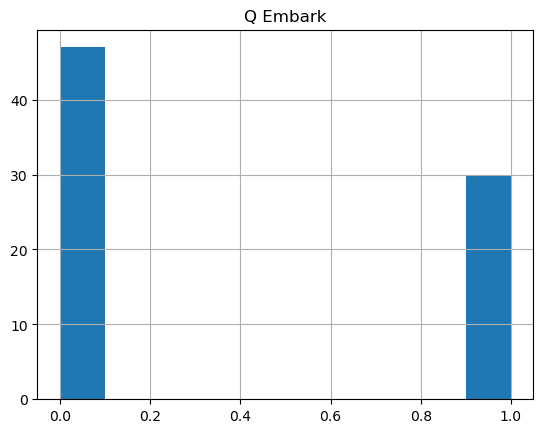

In [ ]:
embark[embark["Embarked"] == "Q"]["Survived"].hist()
plt.title("Q Embark")

Text(0.5, 1.0, 'Survived')

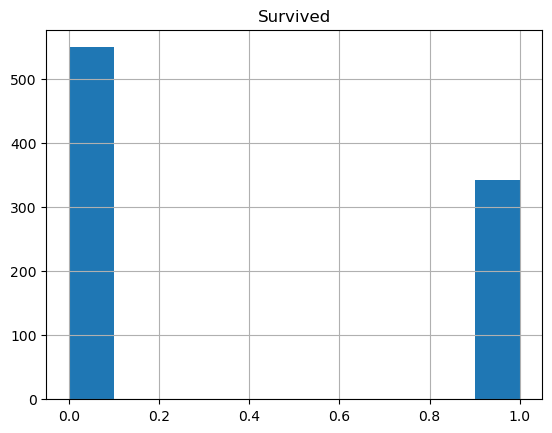

In [ ]:
titanic_survival["Survived"].hist()
plt.title("Survived")

Text(0.5, 1.0, 'Pclass 1')

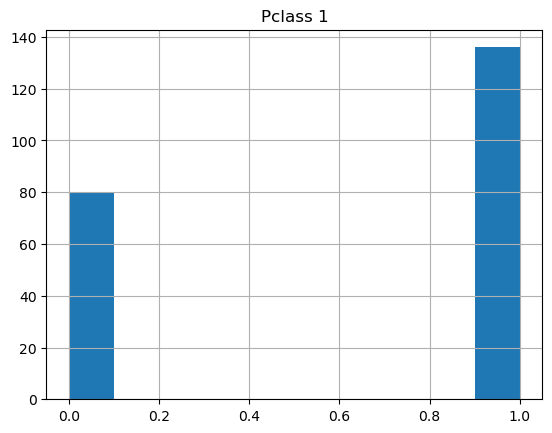

In [ ]:
titanic_survival[titanic_survival["Pclass"] == 1]["Survived"].hist()
plt.title("Pclass 1")

In [ ]:
titanic_survival[titanic_survival["Pclass"] == 1]["Survived"]

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

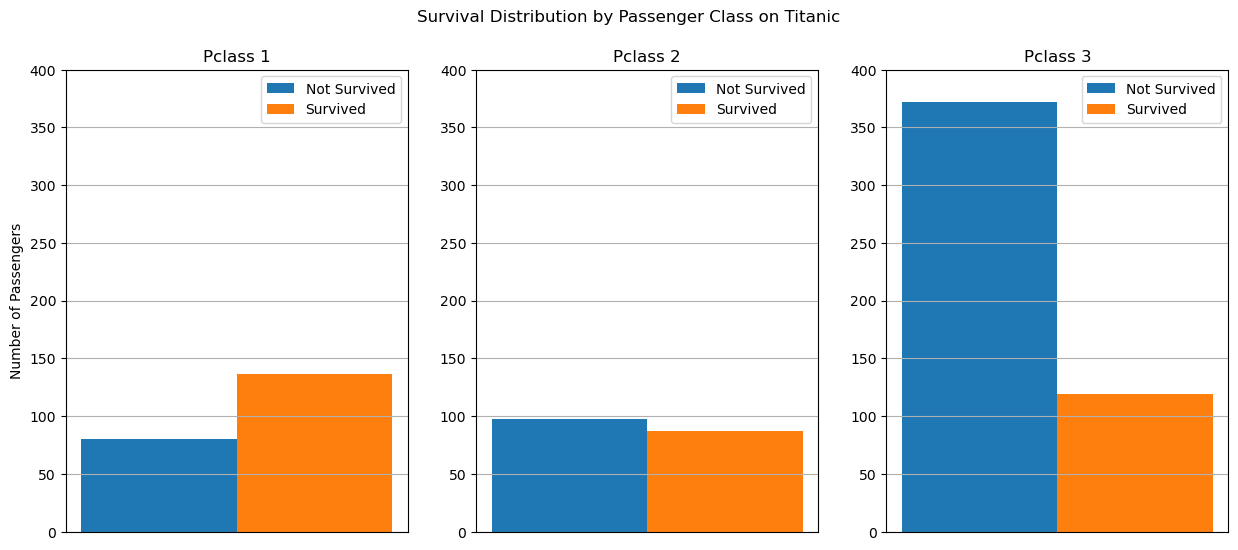

In [ ]:
condition_1 = titanic_survival["Survived"] == 0
condition_2 = titanic_survival["Survived"] == 1

fig, ax = plt.subplots(1,3,figsize=(15,6))


for i in range(3):
    temp_list = [
        titanic_survival[titanic_survival["Pclass"] == i + 1]["Survived"][condition_1],
        titanic_survival[titanic_survival["Pclass"] == i + 1]["Survived"][condition_2],
    ]

    ax[i].hist(temp_list, bins=1, label=["Not Survived", "Survived"])
    ax[i].legend()
    ax[i].set_xticks([])
    ax[i].set_yticks([i for i in range(0,400+1,50)])
    ax[i].grid(True)
    ax[i].set_title(f'Pclass {i+1}')

ax[0].set_ylabel("Number of Passengers")
fig.suptitle('Survival Distribution by Passenger Class on Titanic')


plt.show()

In [ ]:
titanic_survival[titanic_survival["Pclass"] == i+1]["Survived"]
titanic_survival[titanic_survival["Pclass"] == 1]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
11,12,1,1,female,58.0,0,0,26.5500,S
23,24,1,1,male,28.0,0,0,35.5000,S
...,...,...,...,...,...,...,...,...,...
871,872,1,1,female,47.0,1,1,52.5542,S
872,873,0,1,male,33.0,0,0,5.0000,S
879,880,1,1,female,56.0,0,1,83.1583,C
887,888,1,1,female,19.0,0,0,30.0000,S


In [ ]:
by_class = titanic_survival["Pclass"] == i + 1
condition_1 = titanic_survival["Survived"] == 0
condition_2 = titanic_survival["Survived"] == 1

titanic_survival[by_class]["Survived"][condition_1]

0      0
4      0
5      0
7      0
12     0
      ..
882    0
884    0
885    0
888    0
890    0
Name: Survived, Length: 372, dtype: int64

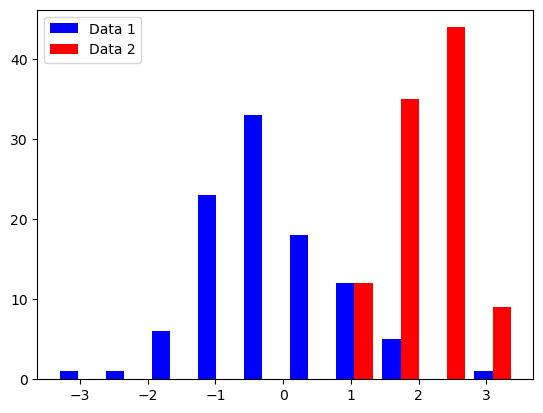

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data1 = np.random.normal(loc=0, scale=1, size=100)
data2 = np.random.normal(loc=2, scale=0.5, size=100)

colors = ['blue', 'red']
labels = ['Data 1', 'Data 2']

plt.hist([data1, data2], color=colors, label=labels)
plt.legend()
plt.show()

In [ ]:
titanic_survival

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


Text(0.5, 1.0, 'Pclass 2')

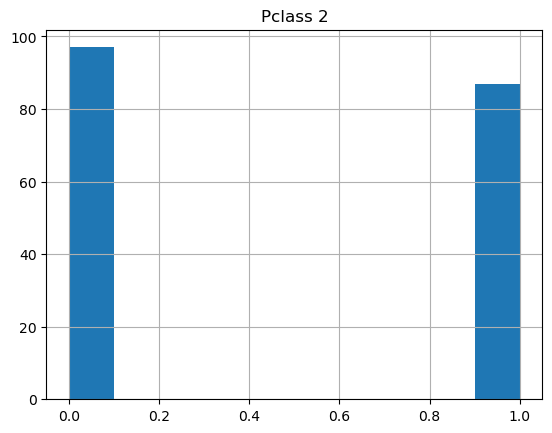

In [ ]:
titanic_survival[titanic_survival["Pclass"] == 2]["Survived"].hist()
plt.title("Pclass 2")

Text(0.5, 1.0, 'Pclass 3')

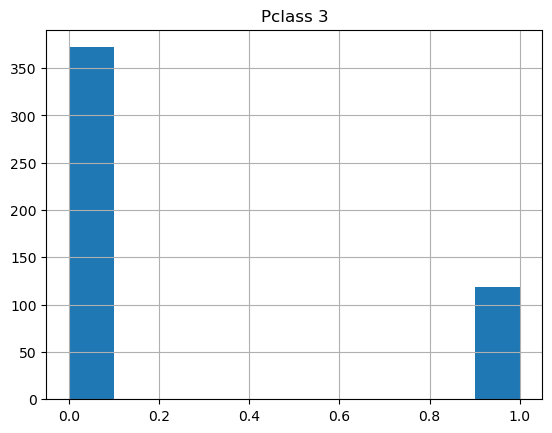

In [ ]:
titanic_survival[titanic_survival["Pclass"] == 3]["Survived"].hist()
plt.title("Pclass 3")

In [ ]:
[titanic_survival["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,['Embarked']_C,['Embarked']_Q,['Embarked']_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",0,15.0,0,0,2667,7.2250,NaN,1,0,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,1,0,0
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25.0,0,1,230433,26.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,0,1


In [ ]:
df_fare.head(60)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


<Axes: >

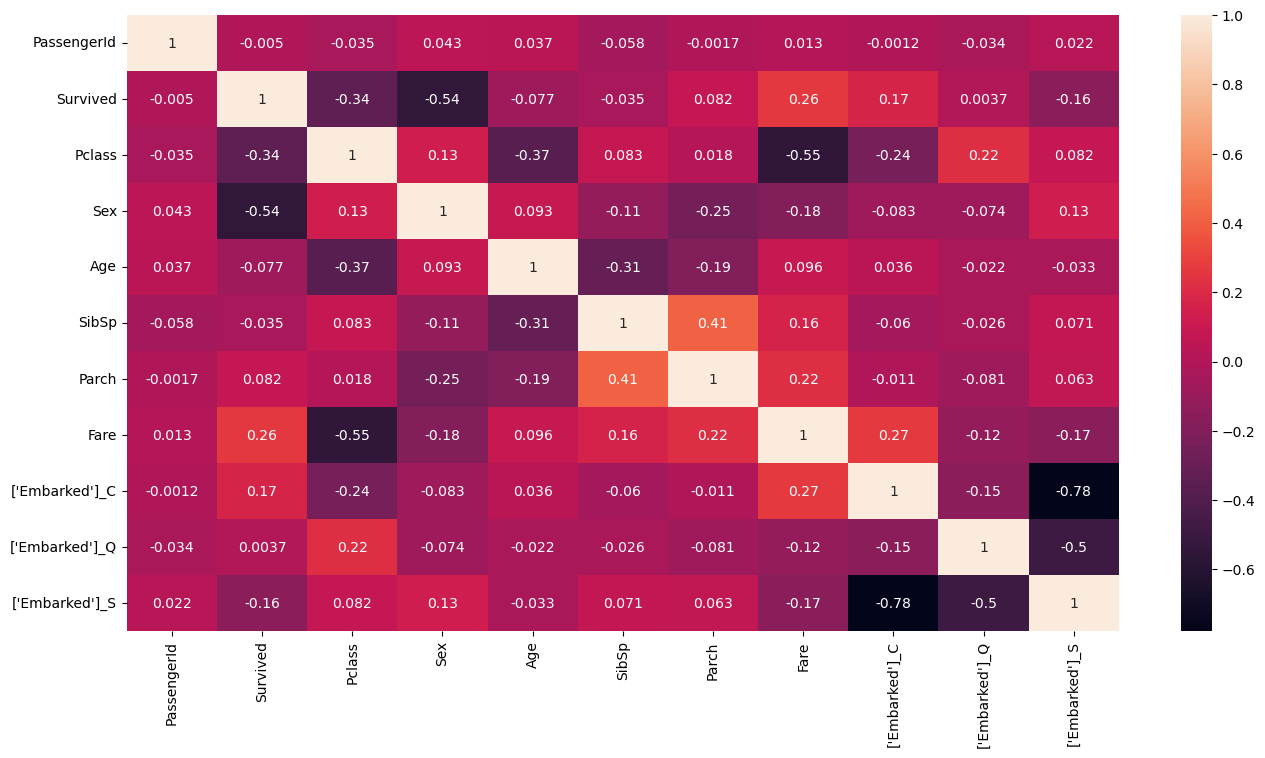

In [ ]:
plt.figure(figsize=(16, 8))

sns.heatmap(data=titanic_survival.select_dtypes(['float64', 'int64']).corr(), annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x169e3b190>,
 'caps': [<matplotlib.lines.Line2D at 0x169e42450>,
 'boxes': [<matplotlib.lines.Line2D at 0x143389bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x169e45450>],
 'fliers': [<matplotlib.lines.Line2D at 0x169e46850>],
 'means': []}

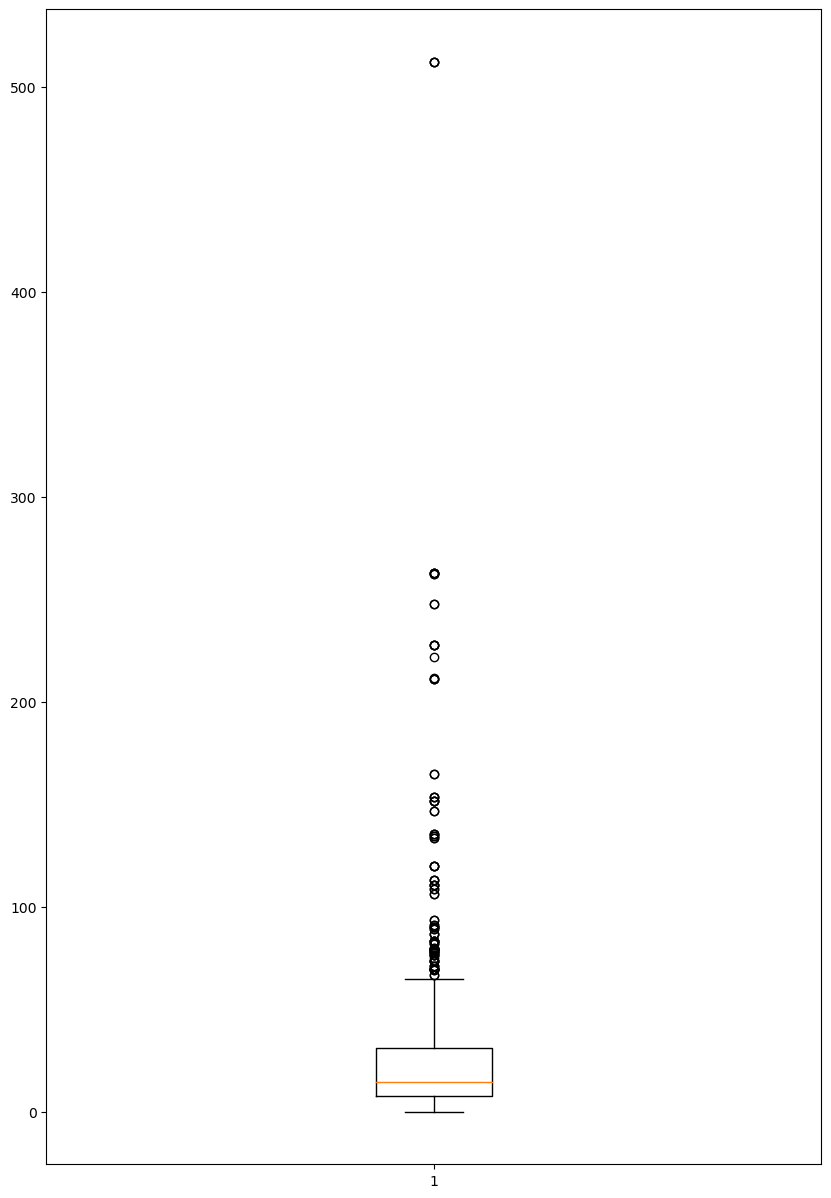

In [ ]:
plt.figure(figsize=(10,15))
plt.boxplot(titanic_survival["Fare"])

In [ ]:
def outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[( df[col] > Q3 +  1.5 * IQR ) | (df[col] < Q1 - 1.5 * IQR)]

In [ ]:
outlier = outliers(titanic_survival , "Fare")

In [ ]:
titanic_survival["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
titanic_survival["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
df_fare = titanic_survival[titanic_survival["Fare"] > 0]

In [ ]:
len(df_fare[(df_fare["Fare"] > 20) & (df_fare["Fare"] <= 50)])

216

Text(0.5, 1.0, 'Rich')

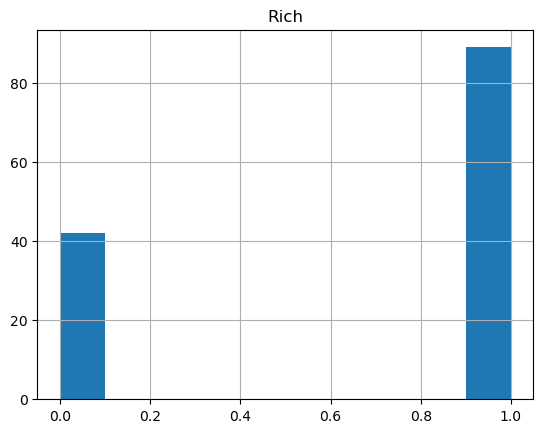

In [ ]:
df_fare[(df_fare["Fare"] > 50) & (df_fare["Fare"] <= 150)]["Survived"].hist()
plt.title("Rich")

Text(0.5, 1.0, 'Middle')

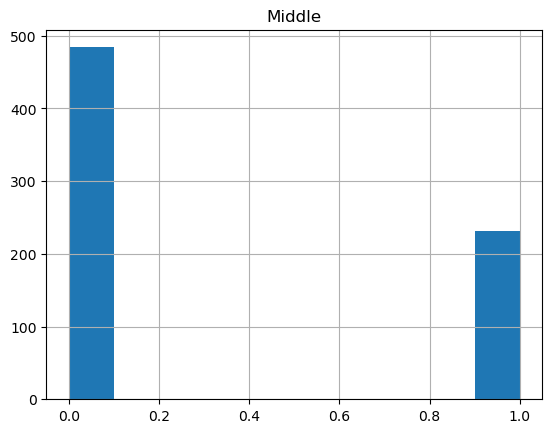

In [ ]:
df_fare[(df_fare["Fare"] > 0) & (df_fare["Fare"] <= 50)]["Survived"].hist()
plt.title("Middle")

Text(0.5, 1.0, 'High Class')

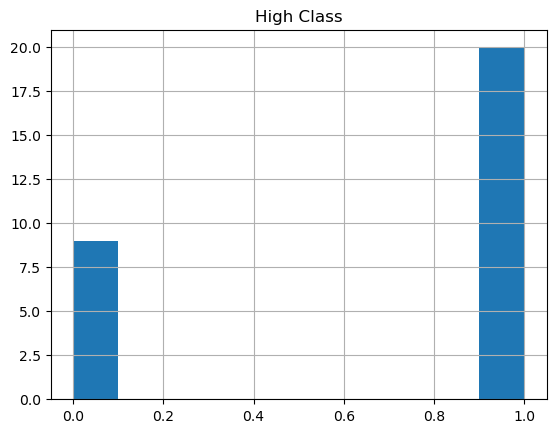

In [ ]:
df_fare[(df_fare["Fare"] > 150) ]["Survived"].hist()
plt.title("High Class")

In [ ]:
titanic_survival

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C
